<a href="https://colab.research.google.com/github/lirui720/Google-E-Commerce-RFM-model/blob/main/RFM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rfmdata.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,fullVisitorId,date,revenue
0,4474128110841843619,2017-06-12,122.96
1,7731550683138800842,2016-10-07,47.18
2,9549186864389701668,2017-06-21,16.99
3,8986872282597680783,2017-05-21,34.19
4,9804405852019862459,2017-06-12,13.98


In [ ]:
df_recency = df.groupby(by='fullVisitorId',
                        as_index=False)['date'].max()
df_recency.columns = ['fullVisitorId', 'date']
recent_date = df_recency['date'].max()
df_recency['Recency'] = df_recency['date'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()


,fullVisitorId,date,Recency
0,213131142648941,2017-04-28,95
1,435324061339869,2016-10-20,285
2,562678147042735,2017-04-24,99
3,585708896049892,2016-12-21,223
4,670722016498267,2017-07-10,22


In [ ]:
frequency_df = df.drop_duplicates().groupby(
    by=['fullVisitorId'], as_index=False)['date'].count()
frequency_df.columns = ['fullVisitorId', 'Frequency']
frequency_df.head()

,fullVisitorId,Frequency
0,213131142648941,1
1,435324061339869,1
2,562678147042735,1
3,585708896049892,1
4,670722016498267,1


In [ ]:

monetary_df = df.groupby(by='fullVisitorId', as_index=False)['revenue'].sum()
monetary_df.columns = ['fullVisitorId', 'Monetary']
monetary_df.head()

,fullVisitorId,Monetary
0,213131142648941,39.59
1,435324061339869,46.79
2,562678147042735,158.31
3,585708896049892,45.97
4,670722016498267,43.98


In [ ]:
rf_df = df_recency.merge(frequency_df, on='fullVisitorId')
rfm_df = rf_df.merge(monetary_df, on='fullVisitorId').drop(
    columns='date')
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary
0,213131142648941,95,1,39.59
1,435324061339869,285,1,46.79
2,562678147042735,99,1,158.31
3,585708896049892,223,1,45.97
4,670722016498267,22,1,43.98


### **1. Achieve Customer segragation by implementing statistical rules to group customer.**

In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,213131142648941,95,1,39.59,71.204451,45.173069,45.173069
1,435324061339869,285,1,46.79,21.668087,45.173069,45.173069
2,562678147042735,99,1,158.31,69.765927,45.173069,45.173069
3,585708896049892,223,1,45.97,42.584332,45.173069,45.173069
4,670722016498267,22,1,43.98,91.940254,45.173069,45.173069


In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['fullVisitorId', 'RFM_Score']].head(7)

,fullVisitorId,RFM_Score
0,213131142648941,2.45
1,435324061339869,2.08
2,562678147042735,2.44
3,585708896049892,2.24
4,670722016498267,2.61
5,852801263780322,2.59
6,1123528056036404,2.20


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['fullVisitorId', 'RFM_Score', 'Customer_segment']].head(20)

,fullVisitorId,RFM_Score,Customer_segment
0,213131142648941,2.45,Low Value Customers
1,435324061339869,2.08,Low Value Customers
2,562678147042735,2.44,Low Value Customers
3,585708896049892,2.24,Low Value Customers
4,670722016498267,2.61,Low Value Customers
5,852801263780322,2.59,Low Value Customers
6,1123528056036404,2.20,Low Value Customers
7,1905118576359487,2.08,Low Value Customers
8,2527528149176601,2.16,Low Value Customers
9,2709834583138581,2.22,Low Value Customers


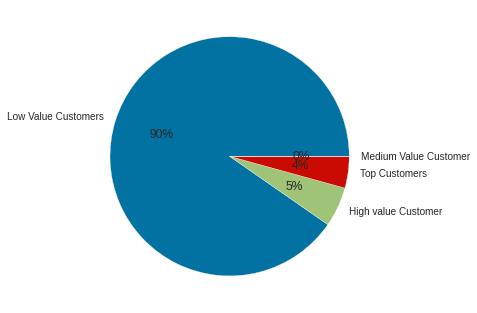

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
rrfm=rfm_df.groupby(["Customer_segment"])["Recency","Frequency","Monetary"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


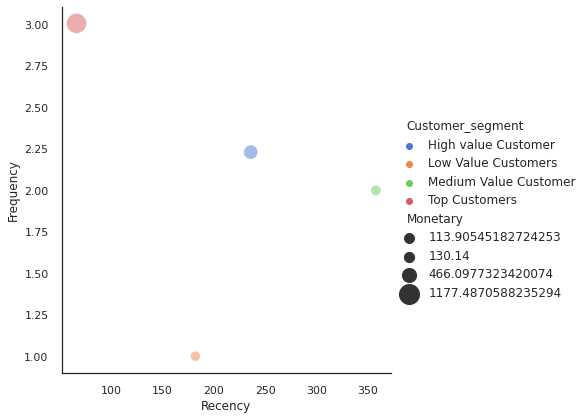

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="Recency", y="Frequency",hue="Customer_segment", size="Monetary",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=rrfm)

Grouped customer based on a self-defined score which is calculated by Recency, Frequency and Monetary Value.


### **2. Achieve Customer segragation by using  k means clustering algorithm**


In [ ]:
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary
0,213131142648941,95,1,39.59
1,435324061339869,285,1,46.79
2,562678147042735,99,1,158.31
3,585708896049892,223,1,45.97
4,670722016498267,22,1,43.98


In [ ]:
rfm_df.describe()

,fullVisitorId,Recency,Frequency,Monetary
count,9.996000e+03,9996.000000,9996.000000,9996.000000
mean,4.478856e+18,179.993197,1.151861,178.086157
std,3.066153e+18,108.295980,0.710352,1437.161083
min,2.131311e+14,0.000000,1.000000,1.200000
25%,1.577139e+18,84.000000,1.000000,29.887500
50%,4.346933e+18,183.000000,1.000000,55.205000
75%,7.132082e+18,270.000000,1.000000,117.065000
max,9.998996e+18,365.000000,33.000000,128412.520000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


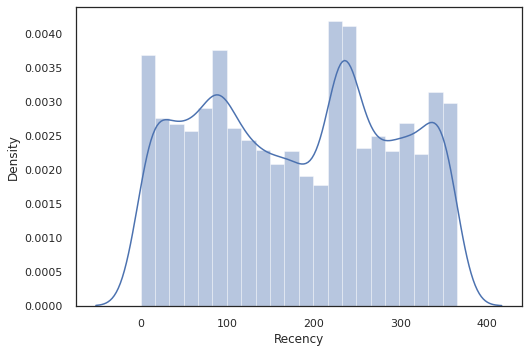

In [ ]:
x = rfm_df['Recency']

ax = sns.distplot(x)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


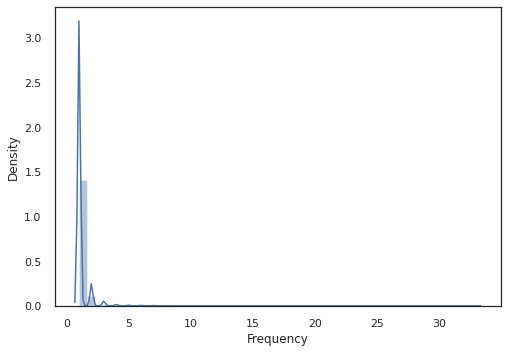

In [ ]:
y = rfm_df['Frequency']

ay = sns.distplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


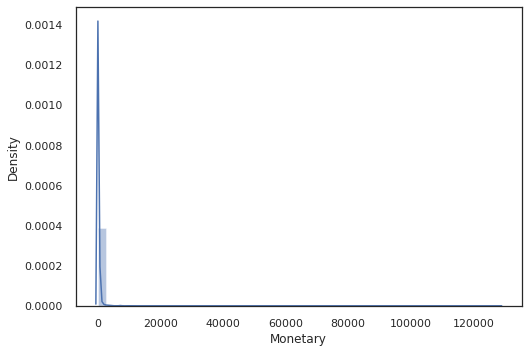

In [ ]:
z = rfm_df['Monetary']

az = sns.distplot(z)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe87aef1c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe87aef7cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe87aefcd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe87aefc7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe87aef7250>,
  <matplotlib.lines.Line2D at 0x7fe87aef7790>]}

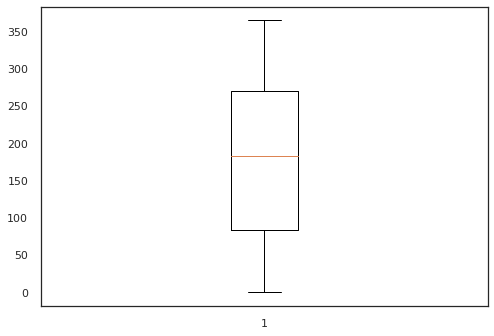

In [ ]:
plt.boxplot(rfm_df.Recency)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe87aed7d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe87aedcdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe87aee5e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe87aee58d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe87aedc350>,
  <matplotlib.lines.Line2D at 0x7fe87aedc890>]}

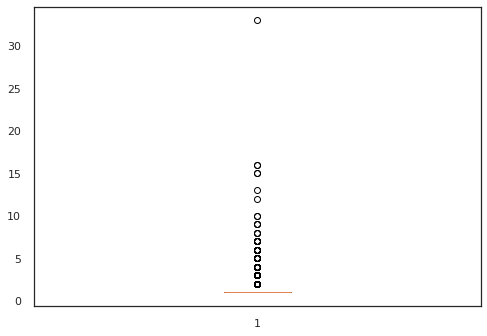

In [ ]:
plt.boxplot(rfm_df.Frequency)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe87ae4d8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe87ae4f950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe87ae58990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe87ae58450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe87ae4de90>,
  <matplotlib.lines.Line2D at 0x7fe87ae4f410>]}

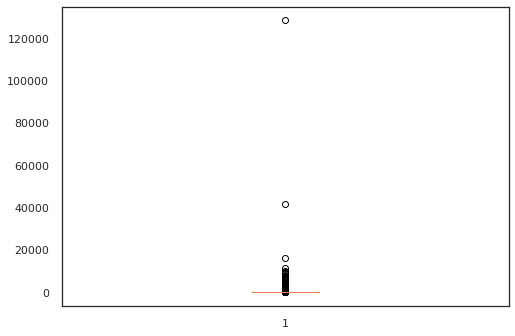

In [ ]:
plt.boxplot(rfm_df.Monetary)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe87acaf3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe87acb1450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe87acc0490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe87acb1f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe87acaf990>,
  <matplotlib.lines.Line2D at 0x7fe87acafed0>]}

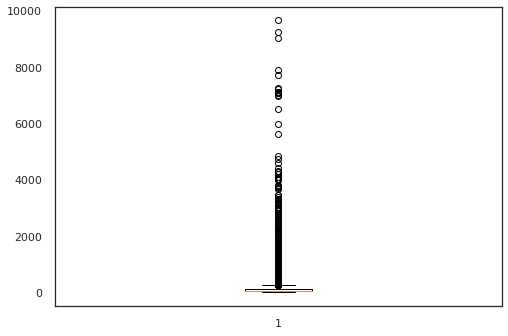

In [ ]:
rfm_df=rfm_df[rfm_df.Monetary <10000]
plt.boxplot(rfm_df.Monetary)

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
rfm1=rfm_df[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[-0.78530734, -0.21650007, -0.26387769],
       [ 0.96946152, -0.21650007, -0.24775124],
       [-0.74836484, -0.21650007,  0.00202949],
       ...,
       [ 0.51691586, -0.21650007, -0.26215305],
       [ 1.70831156, -0.21650007, -0.1236448 ],
       [ 0.72009963, -0.21650007, -0.20253   ]])

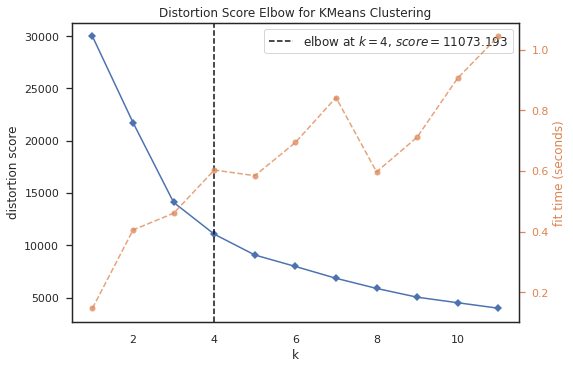

In [ ]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer (model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()  

[0 0 0 ... 0 0 0]
 Our cluster centers are as follows
[[-0.16644846  2.3414023   2.10073974]
 [ 0.86408008 -0.13465246 -0.11970634]
 [-0.89715551 -0.1142279  -0.13033762]
 [-0.534791    9.14775568 12.08530545]]


,Recency,Frequency,Monetary
cluster_pred,,,
0,386,386,386
1,4919,4919,4919
2,4654,4654,4654
3,32,32,32


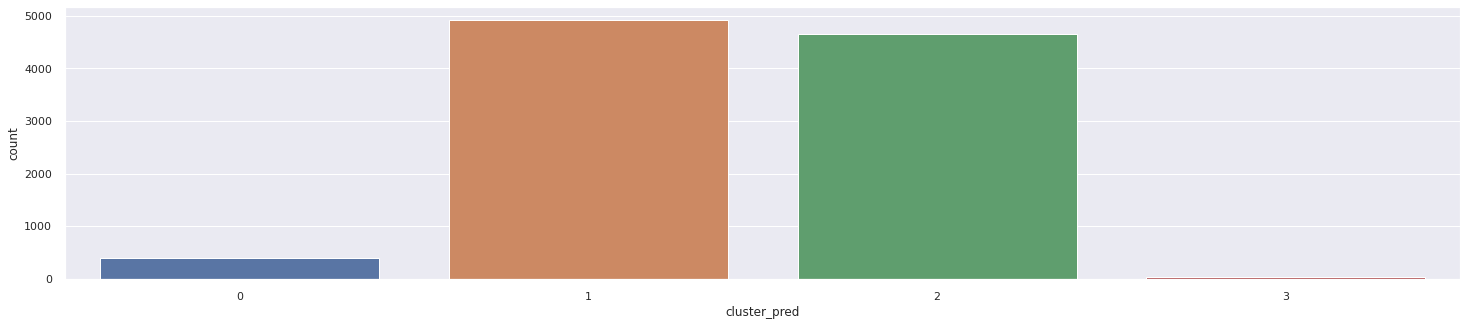

In [ ]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [ ]:
clusters_scaled.groupby(['cluster_pred']).count()

,Recency,Frequency,Monetary
cluster_pred,,,
0,386,386,386
1,4919,4919,4919
2,4654,4654,4654
3,32,32,32


In [ ]:
df_count=clusters_scaled.groupby(['cluster_pred']).count()

In [ ]:
df_count=pd.DataFrame(df_count)
df_count=df_count.loc[:,'Recency'].rename_axis('k_cluster').reset_index()
df_count.rename(columns = {'Recency':'count'}, inplace = True)
df_count



,k_cluster,count
0,0,386
1,1,4919
2,2,4654
3,3,32


In [ ]:
clusters_scaled.groupby(['cluster_pred']).mean()

,Recency,Frequency,Monetary
cluster_pred,,,
0,161.878238,2.756477,1093.913782
1,273.667412,1.056312,103.945038
2,82.964976,1.070047,99.133030
3,122.125000,7.437500,5553.149375


In [ ]:
df_mean=clusters_scaled.groupby(['cluster_pred']).mean()

In [ ]:
df_mean=pd.DataFrame(df_mean)
df_mean=df_mean.rename_axis('k_cluster').reset_index()
df_mean

,k_cluster,Recency,Frequency,Monetary
0,0,161.878238,2.756477,1093.913782
1,1,273.667412,1.056312,103.945038
2,2,82.964976,1.070047,99.133030
3,3,122.125000,7.437500,5553.149375


In [ ]:
df_cluster = df_count.merge(df_mean, on='k_cluster')
df_cluster

,k_cluster,count,Recency,Frequency,Monetary
0,0,386,161.878238,2.756477,1093.913782
1,1,4919,273.667412,1.056312,103.945038
2,2,4654,82.964976,1.070047,99.133030
3,3,32,122.125000,7.437500,5553.149375


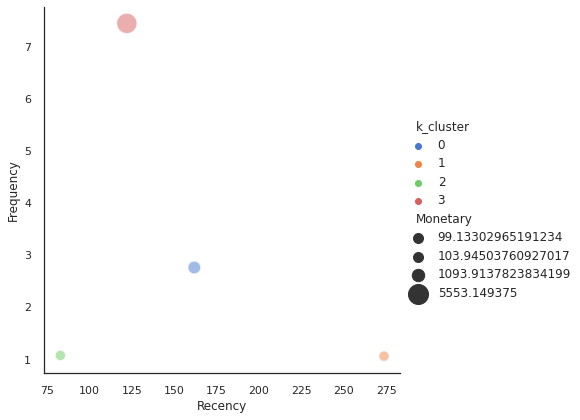

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="Recency", y="Frequency",hue="k_cluster", size="Monetary",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=df_cluster)

In [156]:
clusters_scaled.head()


,Recency,Frequency,Monetary,cluster_pred
0,95,1,39.59,2
1,285,1,46.79,1
2,99,1,158.31,2
3,223,1,45.97,1
4,22,1,43.98,2


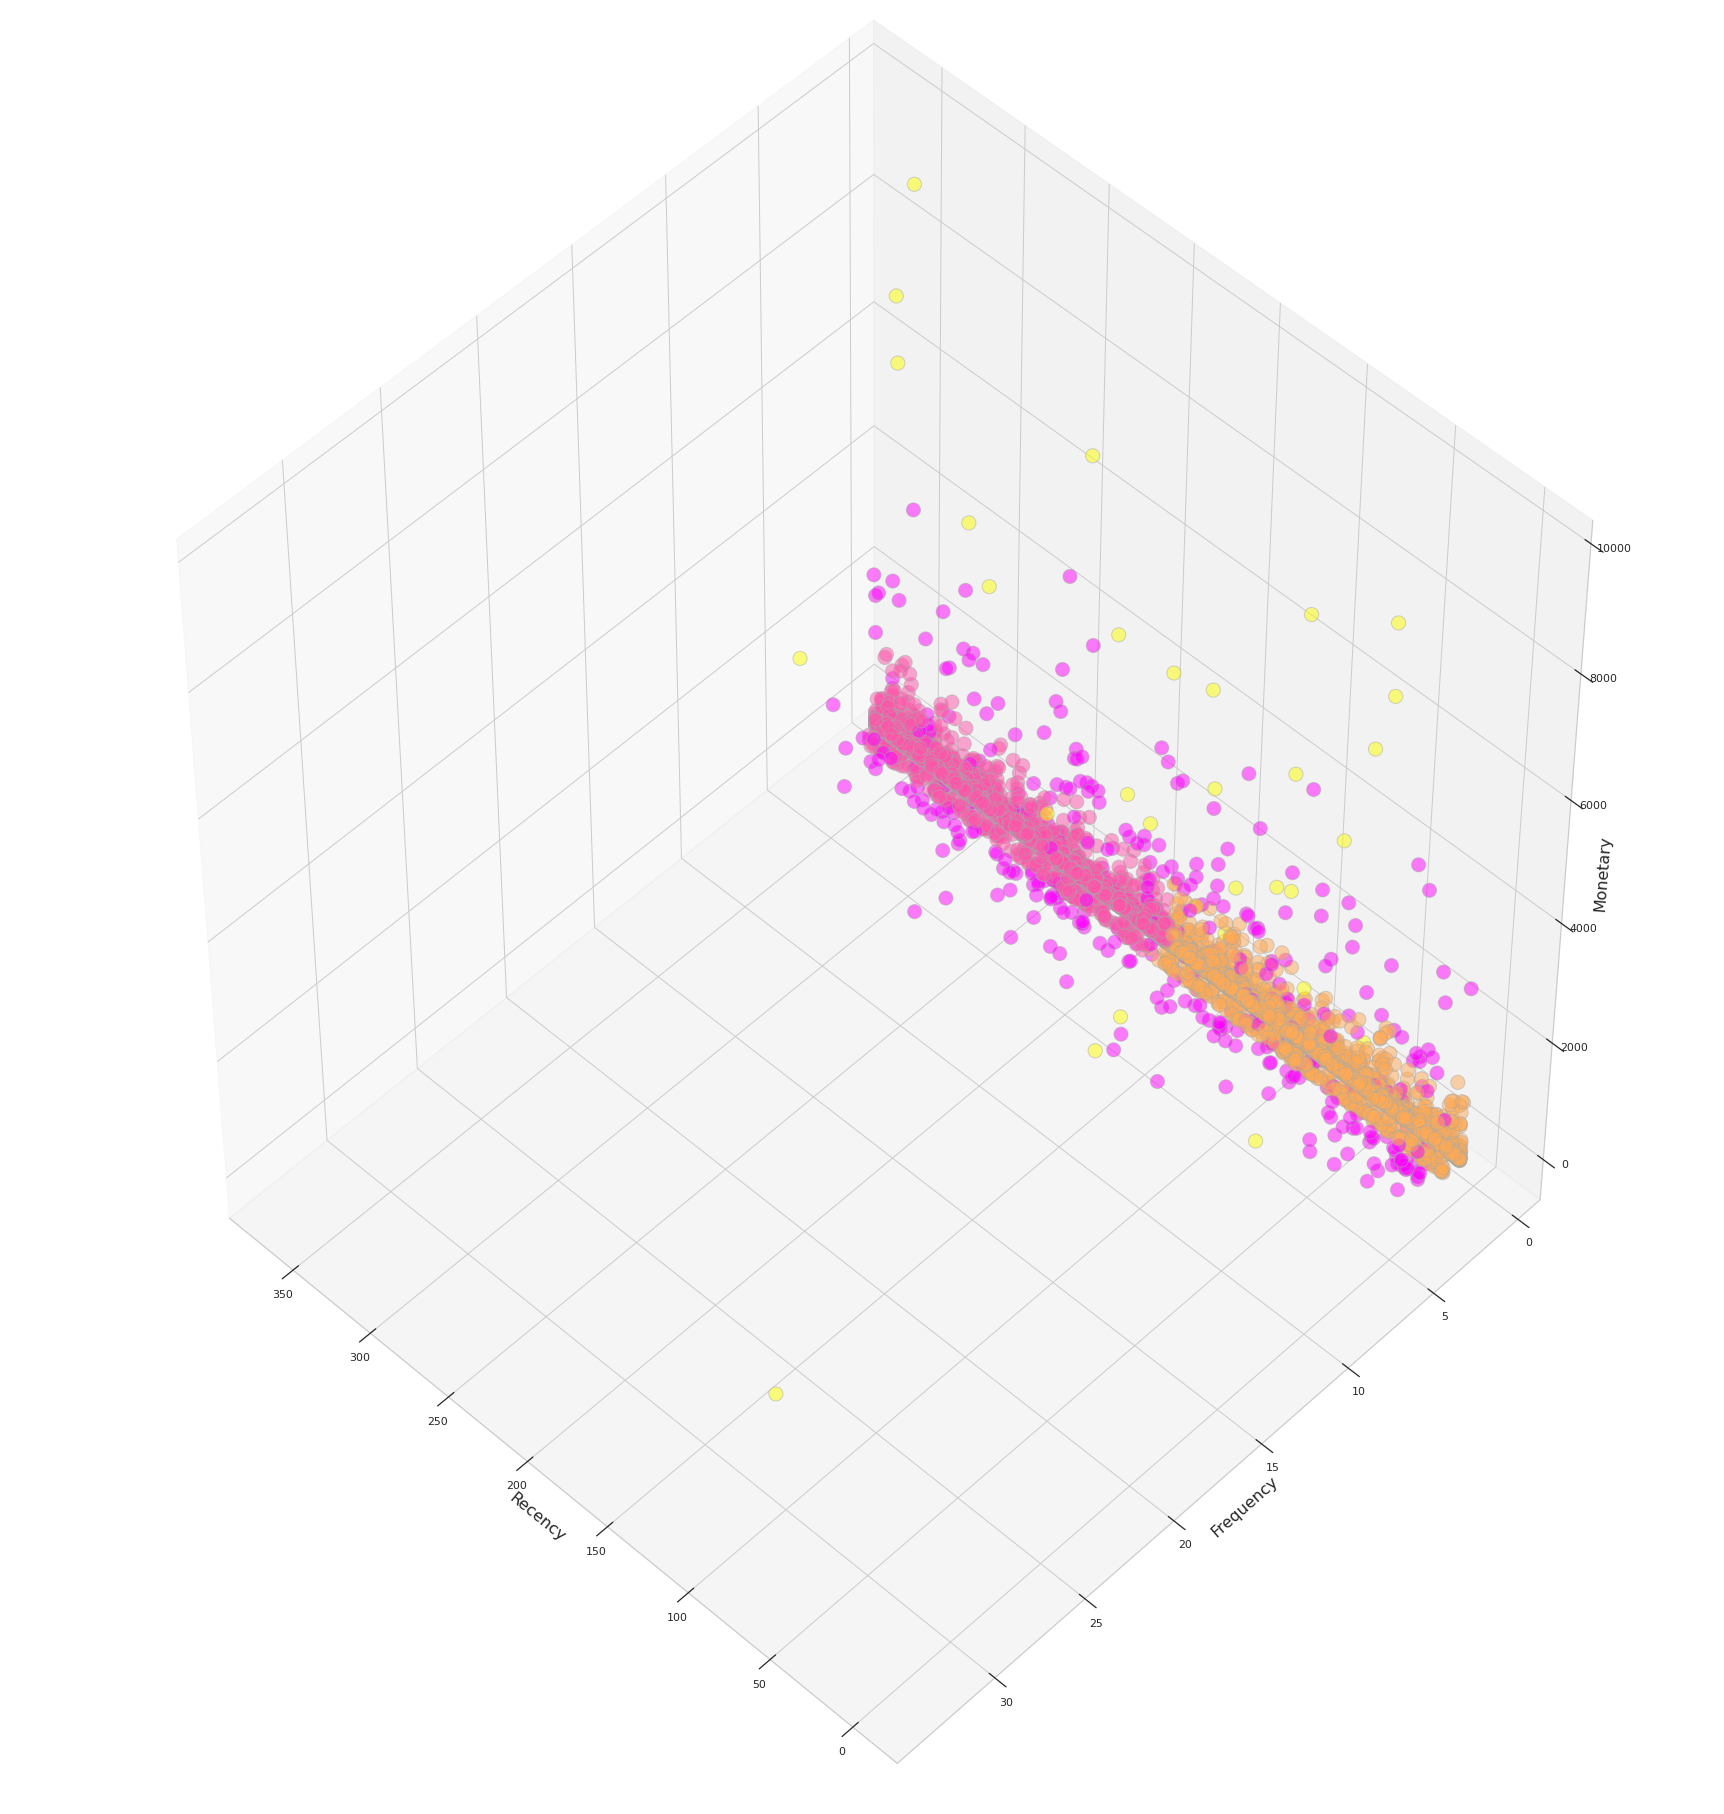

In [169]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(25,25)
fig = plt.figure(1)
plt.clf()
ax= Axes3D(fig,
           rect=[0,0,.95,1],
           elev=48,
           azim=134)
plt.cla()
ax.scatter(clusters_scaled['Recency'],clusters_scaled['Frequency'],clusters_scaled['Monetary'],c=clusters_scaled['cluster_pred'],
           s=200,cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
ax.set_xlabel('Recency',fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
ax.set_zlabel('Monetary',fontsize=16)


plt.show()
           